# Link Prediction Lab

In [4]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

## Graph Input

In [5]:
G = nx.read_edgelist("karate")

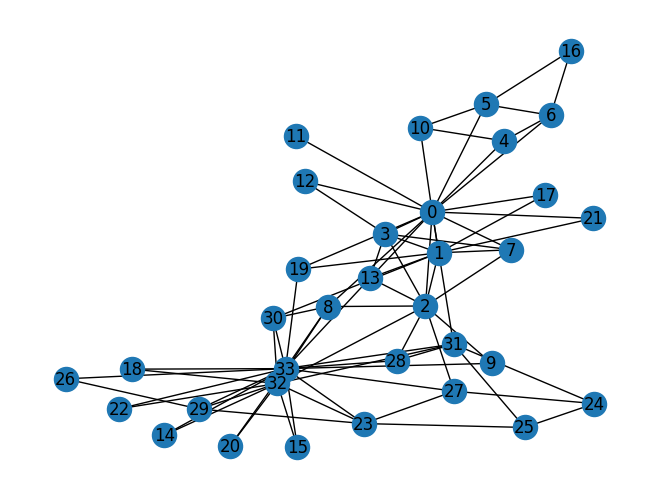

In [6]:
nx.draw(G, with_labels=True)
plt.show()

## Computing Common Neighbors Score

We define the "common neighbours" link score:

In [7]:
def common_neighbors(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))

In [8]:
common_neighbors(G,'31','17')

2

## Link Prediction

We define a function which returns a sorted list of of scores from a node to other possible nodes in the graph:

In [9]:
def link_list(G,i,score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)
    links = []
    for j in G.nodes():
        if not G.has_edge(i,j):
            e = (i,j)
            sc = score_func(G,i,j)
            links.append([e,sc])
    links.sort(key = lambda x: x[1], reverse = True) 
    return links

In [10]:
link_list(G,'31',common_neighbors)

[[('31', '2'), 10],
 [('31', '1'), 9],
 [('31', '31'), 6],
 [('31', '3'), 6],
 [('31', '13'), 5],
 [('31', '8'), 5],
 [('31', '23'), 5],
 [('31', '7'), 4],
 [('31', '6'), 4],
 [('31', '5'), 4],
 [('31', '30'), 4],
 [('31', '27'), 4],
 [('31', '29'), 4],
 [('31', '19'), 3],
 [('31', '10'), 3],
 [('31', '4'), 3],
 [('31', '21'), 2],
 [('31', '17'), 2],
 [('31', '12'), 2],
 [('31', '9'), 2],
 [('31', '16'), 2],
 [('31', '14'), 2],
 [('31', '15'), 2],
 [('31', '18'), 2],
 [('31', '20'), 2],
 [('31', '22'), 2],
 [('31', '26'), 2],
 [('31', '11'), 1]]

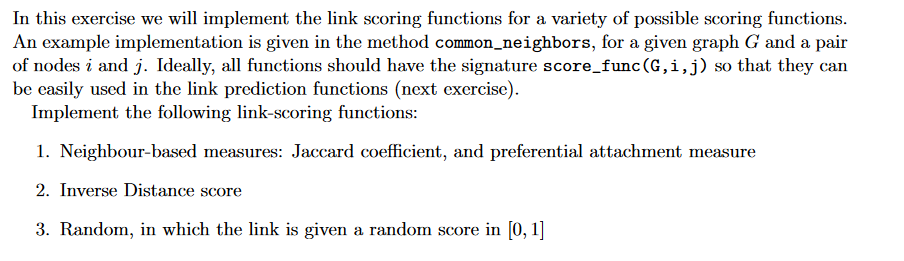

In [14]:
from IPython.display import Image

# Display the image
Image(filename='Link_Prediction/img.png')


In [ ]:
def jaccar